# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Contienen el carácter ';' en lugar de espacios, y en algunos archivos debido al uso de ; y no tener formato, son completamente ilegibles, por lo que utilizaremos el método sep para que sean legibles.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
instacart_orders=pd.read_csv('datasets/instacart_orders.csv',sep=';')
products=pd.read_csv('datasets/products.csv',sep=';')
aisles=pd.read_csv('datasets/aisles.csv', sep=';')
departments=pd.read_csv('datasets/departments.csv', sep=';')
order_product= pd.read_csv('datasets/order_products.csv',sep=';')

In [10]:
instacart_orders.info()
instacart_orders.head(10)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0


In [11]:
products.info()
products.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [12]:
aisles.info()
aisles.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [13]:
departments.info()
departments.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [14]:
order_product.info()
order_product.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Los archivos cuentan con columnas para rastrear el número de cliente, pedido, producto y recompra. Además hay valores ausentes en las órdenes de instacart.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).

- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Buscaremos duplicados y valores ausentes para no inflar o hacer mal los cálculos. Probablemente haya duplicados debido a nombres parecidos o marcas con el mismo producto y diferente gramaje o presentación.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [15]:
instacart_orders.duplicated('order_id').sum()









15

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Hay 15 lineas duplicadas con el mismo pedido e indices distintos.

In [16]:
# Basándote en tus hallazgos

# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

instacart_orders[(instacart_orders['order_dow']==3) &(instacart_orders['order_hour_of_day']==2)]





,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [17]:
instacart_orders.drop_duplicates(inplace=True)

In [18]:
print(instacart_orders.duplicated().sum())

0


In [19]:
instacart_orders.duplicated('order_id').sum()

0

no hay duplicados

### `products` data frame

In [20]:
products.duplicated().sum()

0

In [21]:
products.duplicated(subset='product_id').sum()

0

In [22]:
# Revisa si hay nombres duplicados de producto (convierte los nombres a letras mayúsculas para compararlos mejor)
products["product_name"].str.upper().duplicated().sum()


1361

In [23]:
# Revisa si hay nombres duplicados de productos no faltantes
products[~products["product_name"].isna()]["product_name"].str.upper().duplicated().sum()



104

hay productos faltantes, tendremos que averiguar cuáles son.

### `departments` data frame

In [24]:
departments.duplicated().sum()

0

In [25]:
departments.duplicated(subset='department_id').sum()

0

no hay duplicados

### `aisles` data frame

In [26]:
aisles.duplicated().sum()

0

In [27]:
# Revisa si hay IDs duplicadas de productos
aisles.duplicated(subset='aisle_id').sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [28]:
order_product.duplicated().sum()

0

In [29]:
print(order_product["product_id"].duplicated().sum())
print(order_product[order_product["product_id"].duplicated()])



4499434
         order_id  product_id  add_to_cart_order  reordered
19        2500729       21616                5.0          1
20        1687771       22963                5.0          1
75        2186234       13176                2.0          1
78         145751       47626                8.0          1
80         497429       26209                9.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4499434 rows x 4 columns]


hay varios artículos reordenados una vez, por lo que lo vamos a omitir.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [30]:
# Encuentra los valores ausentes en la columna 'product_name'
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


al parecer hay 1258 productos sin nombre en el pasillo 100 con id 21

In [31]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[products["product_name"].isna()]["aisle_id"].nunique()

1

Todos los productos ausentes están relacionados con el pasillo ID 100

In [32]:
products[products["product_name"].isna()]["department_id"].nunique()


1

al igual que el anterior, están relacionados con el departamento ID 21

In [33]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(aisles.query("aisle_id == 100"))
print()
print(departments.query("department_id == 21"))


    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


son departamentos y pasillos perdidos.

In [34]:
# Completa los nombres de productos ausentes con 'Unknown'
products["product_name"].fillna("Unknown", inplace=True)
products[products["product_name"].isna()]


,product_id,product_name,aisle_id,department_id


Al llamarlos unknown tenemos mejor control de aisle_id y department_id

### `orders` data frame

In [35]:
instacart_orders.isna().sum()


order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [36]:
instacart_orders[instacart_orders["days_since_prior_order"].isna()]



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


los datos ausentes son del ultimo pedido de los clientes, lo cual no convendría cambiarlo a cero por cualquier cálculo.

### `order_products` data frame

In [37]:
order_product.isna().sum()
order_product[order_product['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [38]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

print('Valor mínimo:',order_product['add_to_cart_order'].min())
print('Valor máximo:',order_product['add_to_cart_order'].max())

Valor mínimo: 1.0
Valor máximo: 64.0


Se ha ordenado un producto hasta 64 veces.

In [39]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

id_nan=order_product[order_product["add_to_cart_order"].isna()]["order_id"].unique()

print(id_nan)



[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [40]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
order_product[order_product["order_id"].isin(id_nan)].groupby("order_id")["product_id"].count().sort_values()


order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

los datos ausentes están en pedidos de más de 64.

In [41]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

order_product.fillna({"add_to_cart_order": 999}, inplace=True)

order_product["add_to_cart_order"] = order_product["add_to_cart_order"].astype("int")
order_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int32
 3   reordered          int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB


Se utiliza el número 999 como default para los valores ausentes y ahora todos las columnas son valores enteros.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Descubrimos valores duplicados y ausentes, llenamos valores ausentes sin alterar su número para evitar cualquier problema por lo que nuestros datos estan listos para el siguiente análisis.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [42]:
print(instacart_orders.iloc[:,3:5].describe())




           order_dow  order_hour_of_day
count  478952.000000      478952.000000
mean        2.775051          13.447034
std         2.045901           4.224567
min         0.000000           0.000000
25%         1.000000          10.000000
50%         3.000000          13.000000
75%         5.000000          16.000000
max         6.000000          23.000000


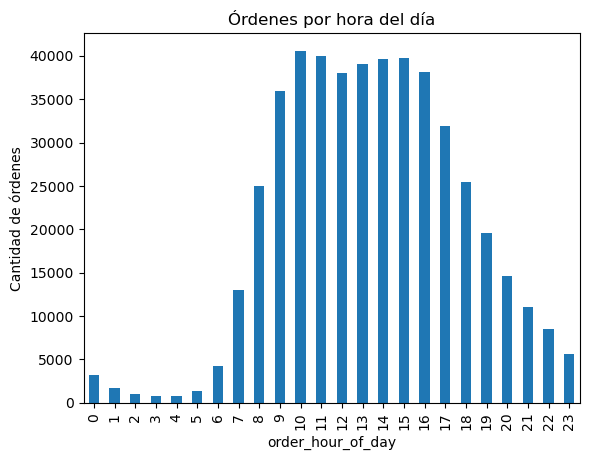

In [43]:
hora_del_dia_compras= instacart_orders['order_hour_of_day'].value_counts().sort_index()
hora_del_dia_compras.plot(kind='bar',title='Órdenes por hora del día',ylabel='Cantidad de órdenes')
plt.show()

las ordenes tienen la hora y el día correcto, en el parámetro del 0-23 para el día y 0 a 6 para la semana.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

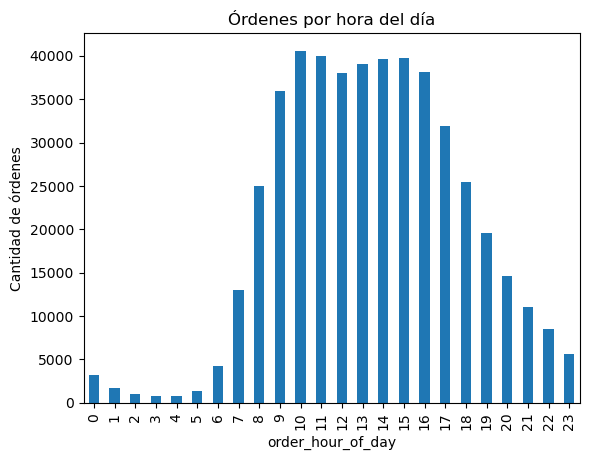

In [44]:
hora_del_dia_compras= instacart_orders['order_hour_of_day'].value_counts().sort_index()
hora_del_dia_compras.plot(kind='bar',title='Órdenes por hora del día',ylabel='Cantidad de órdenes')
plt.show()

A partir de las 10 am y las 15 pm son los pedidos pico.

### [A3] ¿Qué día de la semana compran víveres las personas?

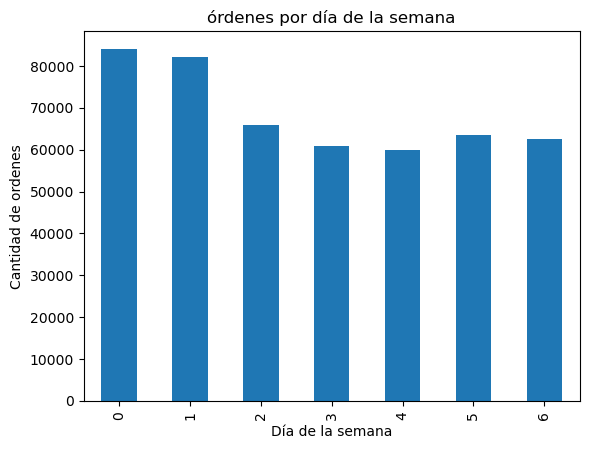

In [45]:
dia_de_la_semana_ordenes=instacart_orders['order_dow'].value_counts().sort_index()
dia_de_la_semana_ordenes.plot(kind='bar',title='órdenes por día de la semana',xlabel='Día de la semana',ylabel='Cantidad de ordenes')
plt.show()


El domingo y el lunes es cuando más hacen pedidos

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

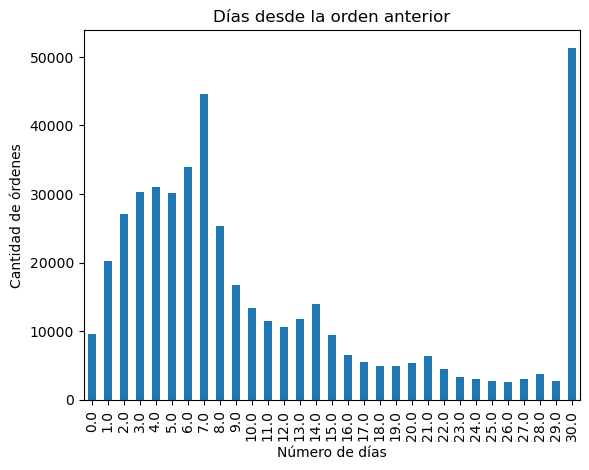

In [46]:
dia_de_espera_ordenes=instacart_orders['days_since_prior_order'].value_counts().sort_index()
dia_de_espera_ordenes.plot(kind='bar',title='Días desde la orden anterior',xlabel='Número de días',ylabel='Cantidad de órdenes')
plt.show()

los mayores pedido tardan 30 días para reordenar y el segundo a la semana.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [47]:
dias= instacart_orders[(instacart_orders["order_dow"]== 3) | (instacart_orders["order_dow"]== 6)]

df_instacart = pd.DataFrame({
    'Miercoles': dias[dias["order_dow"]==3]["order_hour_of_day"].value_counts().sort_index(),
    'Sabado': dias[dias["order_dow"]==6]["order_hour_of_day"].value_counts().sort_index()
})


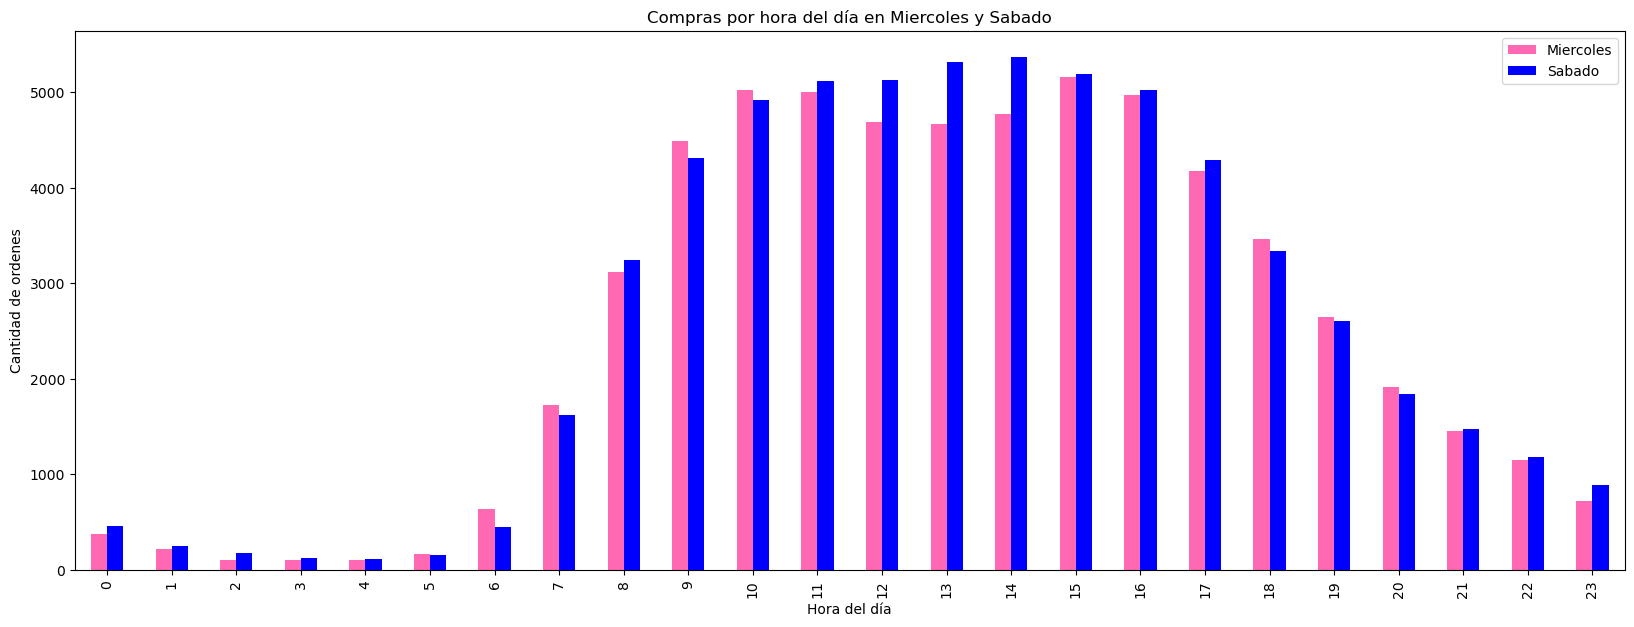

In [48]:
df_instacart.plot(kind='bar',color=["hotpink", "blue"], figsize=(20, 7), title= "Compras por hora del día en Miercoles y Sabado", xlabel="Hora del día", ylabel="Cantidad de ordenes")
plt.show()

la gente suele comprar al medio dia siendo a las 14:00 en sábado donde más compran y a las 15:00 en miercoles
por ende, las horas de más afluencia son 13,14,15 y 16 hrs.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

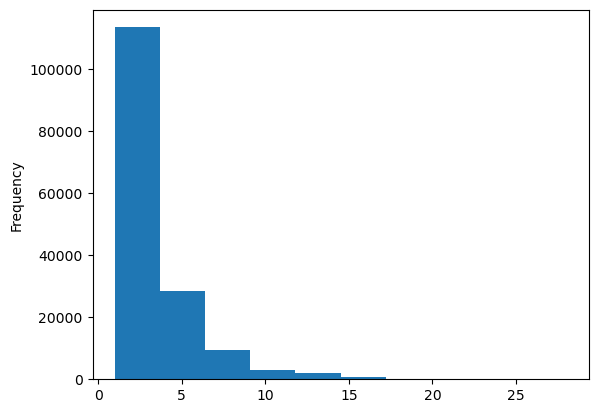

In [49]:
ordenes = instacart_orders.groupby("user_id")["order_id"].count()
ordenes.plot(kind= "hist",bins=10)
plt.show()

Hacen un pedido pero va decreciendo siendo 15 pedidos pedidos por muy pocos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [50]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [51]:
order_product.head(20)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1
6,644579,12341,5,1
7,2231852,44925,10,1
8,3185766,36259,14,1
9,420019,23315,4,1


In [52]:
order_product=order_product.merge(products,on='product_id' )
mejores_productos =order_product.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending=False)

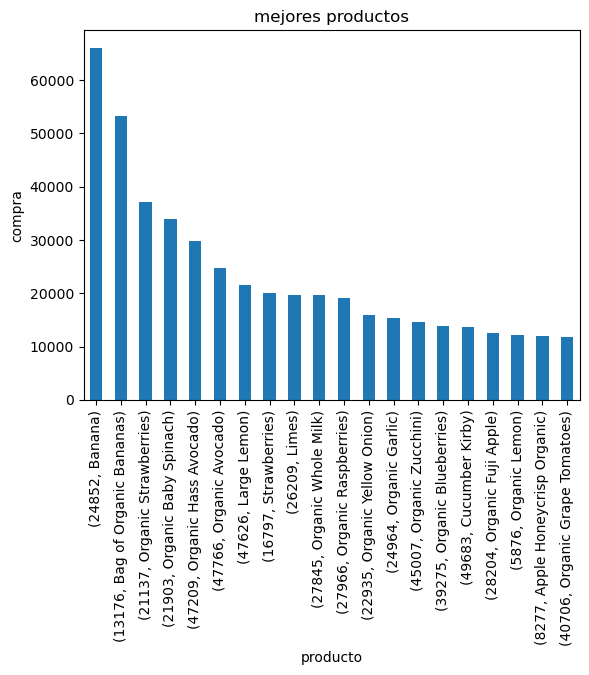

In [53]:
top_20_productos=mejores_productos.head(20)
top_20_productos.plot(kind='bar',title='mejores productos',xlabel='producto',ylabel='compra')
plt.show()

Las bananas son los productos más comprados y como podemos ver los top 20 productos son perecederos de fruta y verdura.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [54]:
articulos = instacart_orders.merge(order_product, on= "order_id")
articulos_pedidos = articulos.groupby(["order_id"])["product_id"].count()
print("pedidos aleatorios para ejemplificar")
print(articulos_pedidos)
print()
print("Media por pedido: ", articulos_pedidos.mean())
print("Moda por pedido: ", articulos_pedidos.mode())


pedidos aleatorios para ejemplificar
order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

Media por pedido:  10.098983215049127
Moda por pedido:  0    5
Name: product_id, dtype: int64


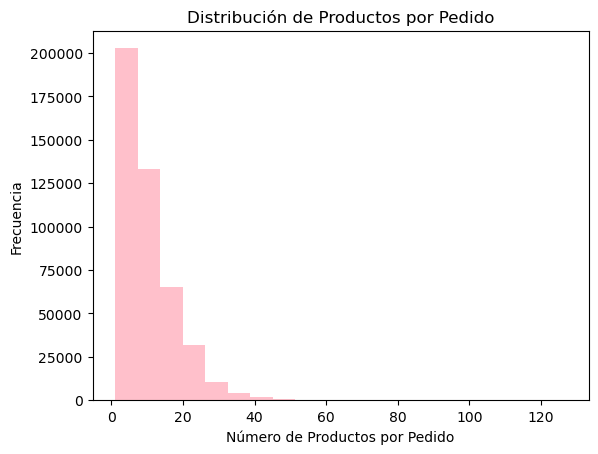

In [55]:
plt.hist(articulos_pedidos, bins=20, color='pink')
plt.title('Distribución de Productos por Pedido')
plt.xlabel('Número de Productos por Pedido')
plt.ylabel('Frecuencia')
plt.show()

la gente suele pedir más de 1 a 10 productos

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [56]:
top_20_productos_reordenados=order_product[order_product['reordered']==1].groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending=False)

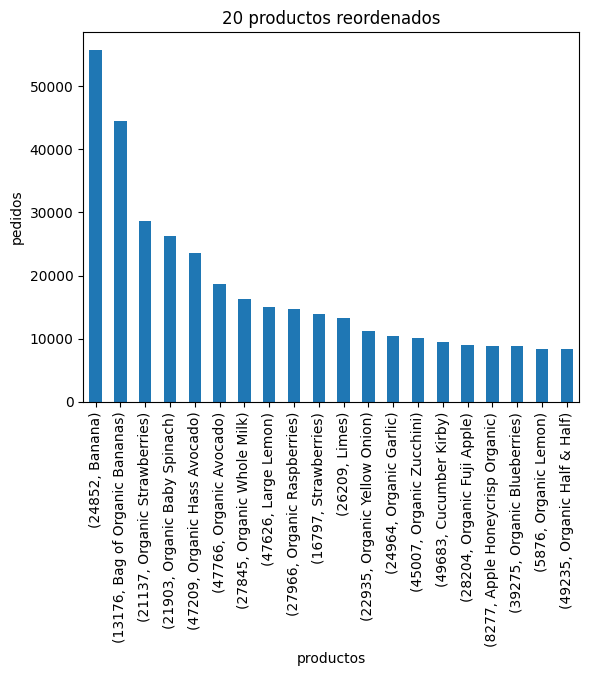

In [47]:
productos_reordenados=top_20_productos_reordenados.head(20)
productos_reordenados.plot(kind='bar',title='20 productos reordenados',xlabel='productos',ylabel='pedidos')

plt.show()

In [58]:
#Los perecederos siguen siendo los más reordenados solo aparece ahora la leche,siendo un basico de despensa.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [59]:
articulos.info()
articulos.groupby()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int32  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
dtypes: float64(1), int32(1), int64(9), object(1)
memory usage: 398.8+ MB


Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [60]:
articulos.groupby(["user_id"])["reordered"].mean().sort_values(ascending=False)

user_id
137587    1.0
173474    1.0
13918     1.0
62300     1.0
62307     1.0
         ... 
190953    0.0
119371    0.0
63173     0.0
63163     0.0
165726    0.0
Name: reordered, Length: 149626, dtype: float64

In [62]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [61]:
principales = products[products["add_to_cart_order"]==1].groupby(["product_id","product_name"])["add_to_cart_order"].value_counts().sort_values(ascending=False).head(20)
print(principales)
principales.plot(kind="bar",title="Los 20 principales",xlabel="Productos", ylabel="veces que es colocado primero en el carrito")
plt.show()

KeyError: 'add_to_cart_order'

Escribe aquí tus conclusiones

### Conclusion general del proyecto:

In [ ]:
El análisis de datos es un trabajo muy exhaustivo, que requiere de gran detalle, atención y sobre todo ver el buen manejo de datos arrojan conclusiones detalladas sobre un problema en general.